Contents
1) Prepare Problem
Load libraries
Load data
About data 

2) Describe Data
Data statistics
Data visualization

3) Prepare Data
a) search outliers
b) undersampling
c) oversampling copy
d) oversampling random atribute
e) oversampling random
f) imblearn.over_sampling.ADASYN
g) imblearn.combine.SMOTETomek
Data split



4) Evaluate Algorithms
Dimensionality reduction

Compare Algorithms

5) Improve Accuracy
Algorithm Tuning
6) Diagnose the performance of the best algorithms
Diagnose overfitting by plotting the learning and validation curves
Further tuning
7) Finalize Model
Create standalone model on entire training dataset

Predictions on test dataset

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import iqr, zscore
from statistics import median
import matplotlib.pyplot as plt

In [2]:
column_names = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
glass_data = pd.read_csv('glass_data.csv', names=column_names).reset_index(drop=True)
print(glass_data.shape)

(214, 10)


In [3]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
glass_data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


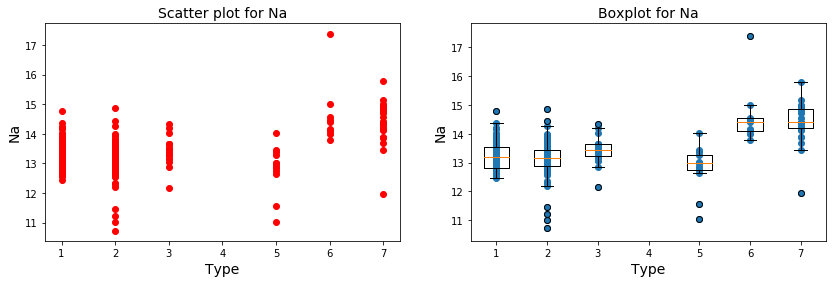

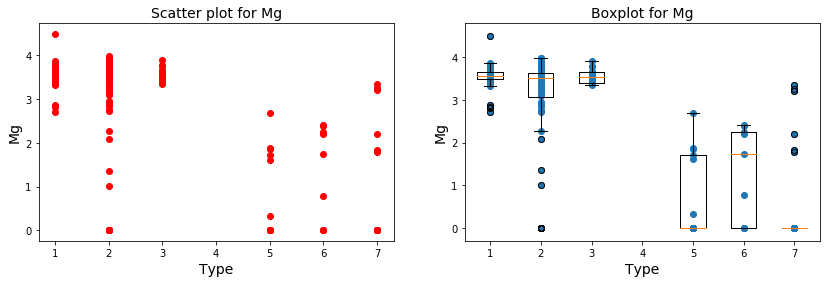

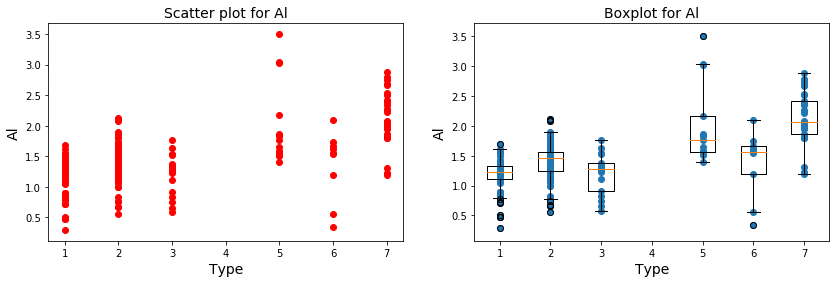

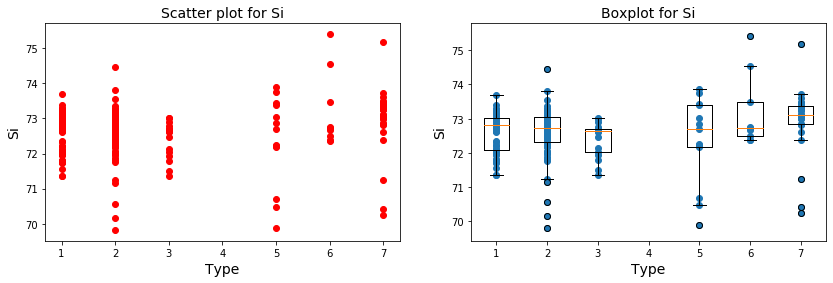

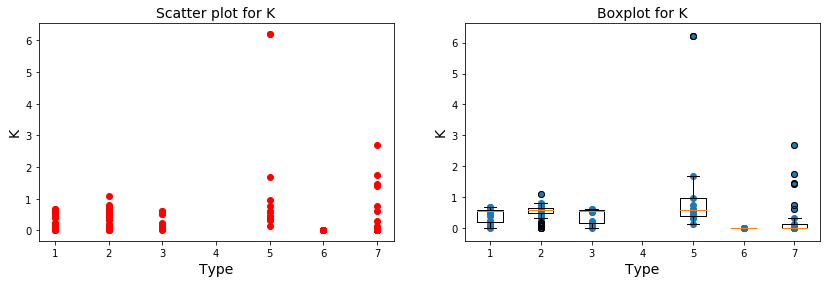

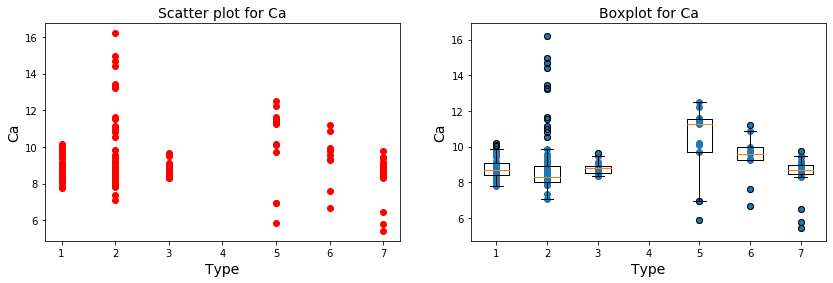

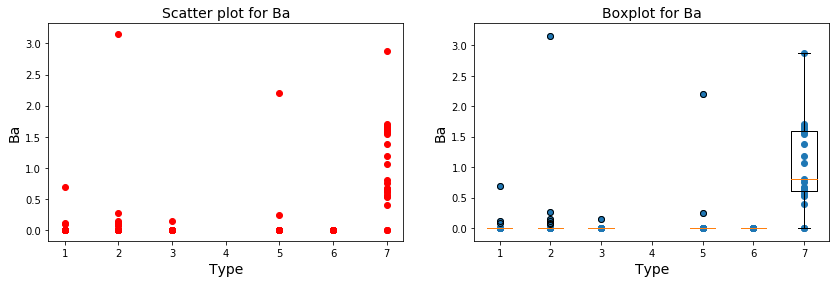

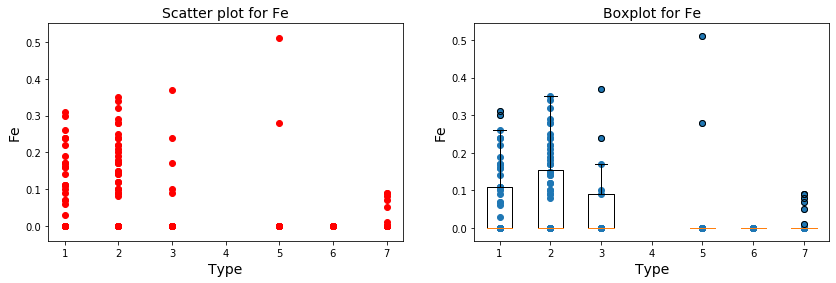

In [77]:
chemical_element=["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

for index, element in enumerate(chemical_element):
    f, axes = plt.subplots(1,2,figsize=(14,4))

    axes[0].scatter(glass_data["Type"], glass_data[element], c='r')
    axes[0].set_xlabel("Type", fontsize=14)
    axes[0].set_ylabel(element, fontsize=14)
    axes[0].set_title(f"Scatter plot for {element}", fontsize=14)
    axes[0].yaxis.tick_left()
    
    axes[1].boxplot([glass_data[element][glass_data.Type == 1], 
                    glass_data[element][glass_data.Type == 2],
                    glass_data[element][glass_data.Type == 3],
                    glass_data[element][glass_data.Type == 4],
                    glass_data[element][glass_data.Type == 5],
                    glass_data[element][glass_data.Type == 6],
                    glass_data[element][glass_data.Type == 7]])
    axes[1].scatter(glass_data["Type"], glass_data[element])
    axes[1].set_xlabel("Type", fontsize=14)
    axes[1].set_ylabel(element, fontsize=14)
    axes[1].set_title(f"Boxplot for {element}", fontsize=14)
    axes[1].yaxis.tick_left()
    
    plt.show()

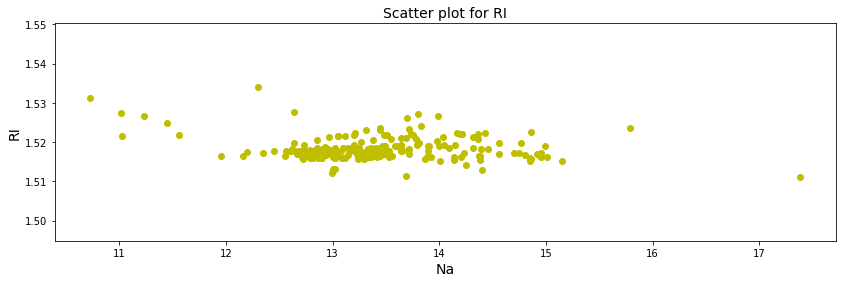

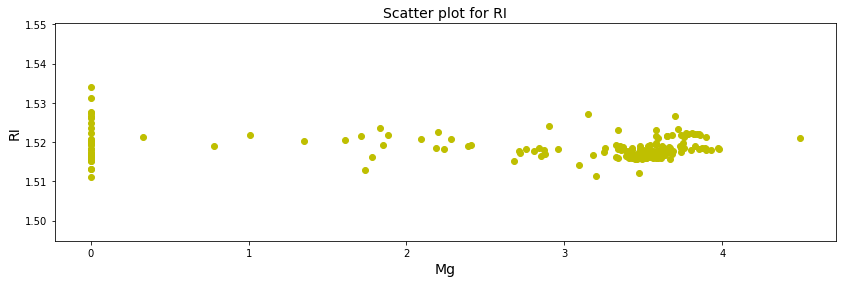

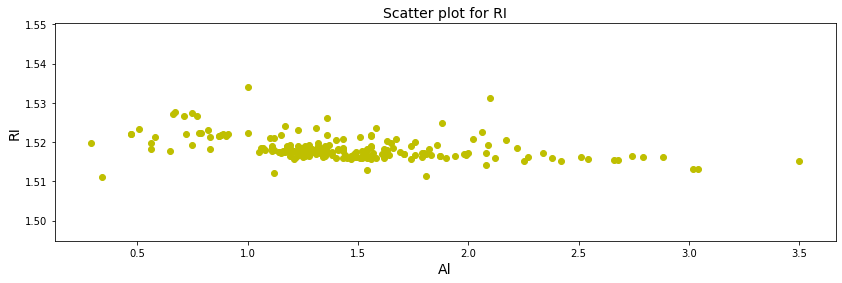

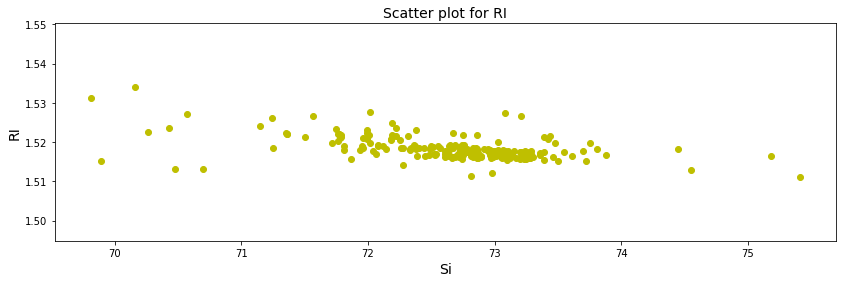

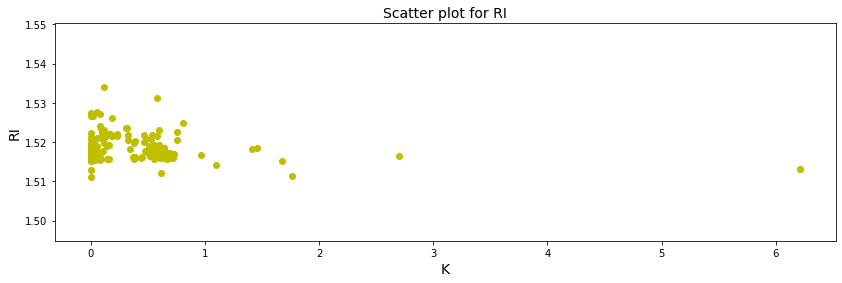

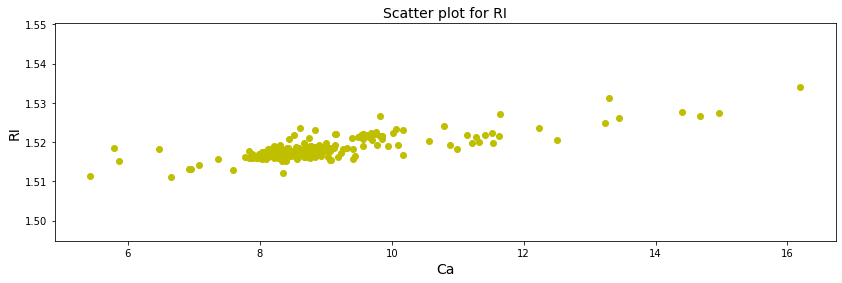

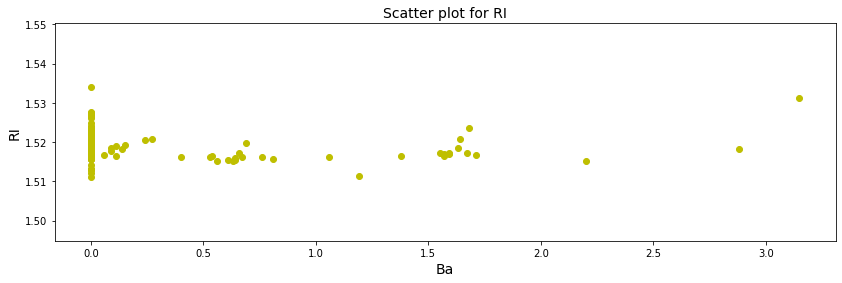

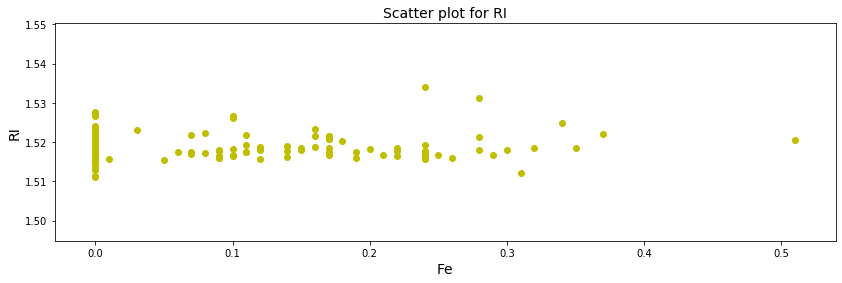

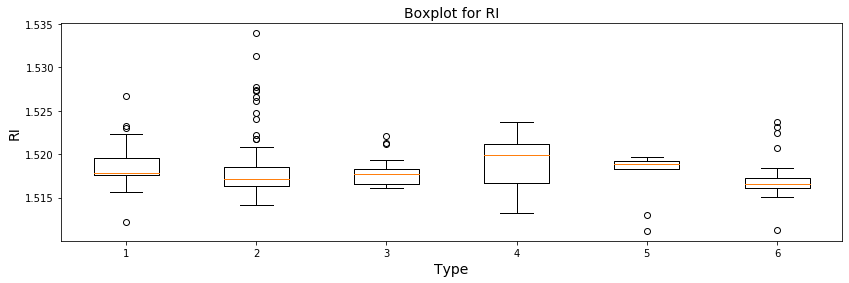

In [76]:
chemical_element=["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

for index, element in enumerate(chemical_element):
    plt.figure(figsize=(14,4))

    plt.scatter(glass_data[element], glass_data.RI, c='y')
    plt.xlabel(element, fontsize=14)
    plt.ylabel("RI", fontsize=14)
    plt.title(f"Scatter plot for RI", fontsize=14)
    
plt.figure(figsize=(14,4))
plt.boxplot([glass_data.RI[glass_data.Type == 1], 
                glass_data.RI[glass_data.Type == 2],
                glass_data.RI[glass_data.Type == 3],
                glass_data.RI[glass_data.Type == 5],
                glass_data.RI[glass_data.Type == 6],
                glass_data.RI[glass_data.Type == 7]])

plt.xlabel("Type", fontsize=14)
plt.ylabel("RI", fontsize=14)
plt.title(f"Boxplot for RI", fontsize=14)

plt.show()

In [14]:
CHEMICAL_ELEMENT = ["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"] 

def outlier_IQR(df: pd.DataFrame, threshold: int = 1.5) -> pd.DataFrame:
    """Gets the original data frame and returns a data frame without outlier, searching 
    in each chemical element using interquartile range (IQR) """
    outlier_index = pd.DataFrame([])

    for column in CHEMICAL_ELEMENT:
        IQR = iqr(df[column])
        outlier_threshold = threshold * IQR
        median = df[column].median()
        
        good_rows = df[column].between(median-outlier_threshold, median+outlier_threshold)
        outlier_rows = df[list(~good_rows)]
        outlier_index = pd.concat([outlier_index, outlier_rows])
    outlier_index = outlier_index[outlier_index.duplicated()]
    
    return df[~df.index.isin(outlier_index.index.unique())].reset_index(drop=True)

def outlier_zscore(df: pd.DataFrame, threshold: int = 3) -> pd.DataFrame:
    """Gets the original data frame and returns a data frame without outlier, searching 
    in each chemical element using z score"""
    outlier_index = pd.DataFrame([])

    for column in CHEMICAL_ELEMENT:
        ZSCR = zscore(df[column])
        
        good_rows = pd.Series(ZSCR).between(-threshold, threshold)
        outlier_rows = df[list(~good_rows)]
        outlier_index = pd.concat([outlier_index, outlier_rows])
    outlier_index = outlier_index[outlier_index.duplicated()]
    
    return df[~df.index.isin(outlier_index.index.unique())].reset_index(drop=True)

In [34]:
glass_data_without_outlier_method_1 = outlier_IQR(glass_data, 2.5)
glass_data_without_outlier_method_2 = outlier_zscore(glass_data)

In [16]:
glass_data_type_1 = glass_data[glass_data.Type == 1]
glass_data_type_2 = glass_data[glass_data.Type == 2]
glass_data_type_3 = glass_data[glass_data.Type == 3]
glass_data_type_5 = glass_data[glass_data.Type == 5]
glass_data_type_6 = glass_data[glass_data.Type == 6]
glass_data_type_7 = glass_data[glass_data.Type == 7]

In [28]:
glass_data_typing_without_outlier_method_1 = pd.concat([
    outlier_IQR(glass_data_type_1),
    outlier_IQR(glass_data_type_2),
    outlier_IQR(glass_data_type_3, 2),
    outlier_IQR(glass_data_type_5, 2),
    outlier_IQR(glass_data_type_6, 2),
    outlier_IQR(glass_data_type_7),
                                                       ]).reset_index(drop=True)
glass_data_typing_without_outlier_method_2 =  pd.concat([
    outlier_zscore(glass_data_type_1),
    outlier_zscore(glass_data_type_2),
    outlier_zscore(glass_data_type_3, 4),
    outlier_zscore(glass_data_type_5, 4),
    glass_data_type_6,
    outlier_zscore(glass_data_type_7),
                                                       ]).reset_index(drop=True)

In [44]:
print(f"""All data without outliers using IQR method
{glass_data_without_outlier_method_1['Type'].value_counts()}""")
print(f"""All data without outliers using Z-score method
{glass_data_without_outlier_method_2['Type'].value_counts()}""")
print(f"""Separate data group without outliers using IQR method
{glass_data_typing_without_outlier_method_1['Type'].value_counts()}""")
print(f"""Separate data group without outliers using Z-score method
{glass_data_typing_without_outlier_method_2['Type'].value_counts()}""")

All data without outliers using IQR method
2    72
1    70
7    18
3    17
6     8
5     8
Name: Type, dtype: int64
All data without outliers using Z-score method
2    74
1    70
7    28
3    17
5    10
6     8
Name: Type, dtype: int64
Separate data group without outliers using IQR method
2    57
1    52
7    22
3    16
5     9
6     7
Name: Type, dtype: int64
Separate data group without outliers using Z-score method
2    73
1    69
7    28
3    17
5    13
6     9
Name: Type, dtype: int64


In [ ]:
# Define X as features and y as lablels
X = glass_data.drop("Type", axis=1)
y = glass_data['Type'] 

In [ ]:
# set a seed and a test size for splitting the dataset 
seed = 42
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)